<a href="https://colab.research.google.com/github/jongjong2323/colab01/blob/main/4%ED%9A%8C_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras
딥러닝용의 프레임워크 Keras를 사용해 최소한의 코드로 딥러닝을 구현함.
Keras는 Python으로 쓰여져 TensorFlow 혹은 CNTK, Theano상에서 실행할 수 있는 머신러닝 프레임워크이다.

In [ ]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.data.shape)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

t = np_utils.to_categorical(iris.target)
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test, = train_test_split(x,t, train_size=0.75)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainabl

In [ ]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 10ms/step - loss: 1.1496 - accuracy: 0.2054
Epoch 2/30
14/14 [==============================] - 0s 6ms/step - loss: 1.0927 - accuracy: 0.3929
Epoch 3/30
14/14 [==============================] - 0s 4ms/step - loss: 1.0444 - accuracy: 0.4732
Epoch 4/30
14/14 [==============================] - 0s 6ms/step - loss: 0.9982 - accuracy: 0.5357
Epoch 5/30
14/14 [==============================] - 0s 4ms/step - loss: 0.9539 - accuracy: 0.7411
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9120 - accuracy: 0.7946
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8732 - accuracy: 0.7946
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8381 - accuracy: 0.8036
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8039 - accuracy: 0.8125
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7694 - accuracy: 0.8036
Epoch 11/30
14/14 

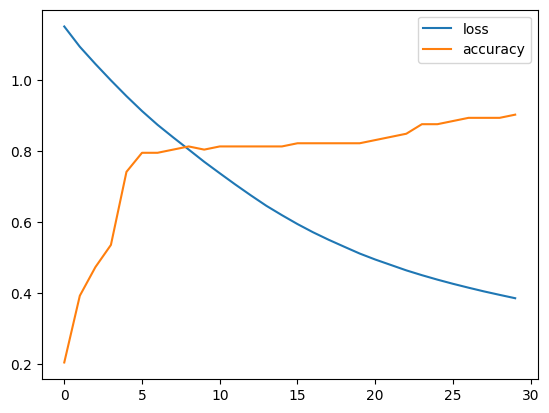

In [ ]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']
hist_acc = history.history['accuracy']

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, t_test)
print('오차:', loss, '정밀도:', accuracy)

2/2 [==============================] - 0s 6ms/step - loss: 0.3047 - accuracy: 0.8947
오차: 0.3046971261501312 정밀도: 0.8947368264198303


In [ ]:
y_test = model.predict(x_test)
print(y_test[:10])

2/2 [==============================] - 0s 5ms/step
[[0.9209256  0.06999777 0.00907653]
 [0.08769566 0.4080586  0.5042457 ]
 [0.9360383  0.05669214 0.00726952]
 [0.90043    0.08943445 0.01013549]
 [0.8853488  0.10177942 0.01287177]
 [0.9161416  0.0744843  0.00937416]
 [0.07289322 0.505058   0.42204872]
 [0.05749069 0.3142227  0.6282866 ]
 [0.06461933 0.42502922 0.5103515 ]
 [0.07246099 0.3313627  0.5961763 ]]


In [ ]:
from tensorflow.keras.models import load_model

model.save('model.h5')
load_model('model.h5')